## Observations and Insights

## 1.   Ramicane effect on tumor volume appears to have the most reproducable results as the variance and standard deviations are the lowest of all of the treatment regimens.  This is also one of the most robust data sets with the highest number of data points which may contribute to the lower stdev.

## 2.  There does not appear to be a prevalence in either gender for the treatment data set as a whole.  One could determine if any single treatment regimen has a greater effect based on gender by isolating the gender distribution for that regimen.

## 3.  Tumor volume appears to be proportional to body weight, that is that as mouse body weight increases, average tumor volume increases.
 

## Dependencies and starter code

In [146]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

%matplotlib notebook

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [147]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Calculate summary statistics
mean_tumor_volume = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor_volume = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdev_tumor_volume = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_volume = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Create new data frame for statistics
summary_statistics_df = pd.DataFrame({"Mean Tumor Volume(mm3)": mean_tumor_volume, "Median Tumor Volume(mm3)":median_tumor_volume, "Variance": variance_tumor_volume, "Standard Deviation": stdev_tumor_volume, "SEM": sem_tumor_volume})

# Format values for summary table
summary_statistics_df["Mean Tumor Volume(mm3)"] = summary_statistics_df["Mean Tumor Volume(mm3)"] .map("{0:,.1f}".format)
summary_statistics_df["Median Tumor Volume(mm3)"] = summary_statistics_df["Median Tumor Volume(mm3)"] .map("{0:,.1f}".format)
summary_statistics_df["Variance"] = summary_statistics_df["Variance"] .map("{0:,.1f}".format)
summary_statistics_df["Standard Deviation"] = summary_statistics_df["Standard Deviation"] .map("{0:,.2f}".format)
summary_statistics_df["SEM"] = summary_statistics_df["SEM"] .map("{0:,.2f}".format)

summary_statistics_df

,Mean Tumor Volume(mm3),Median Tumor Volume(mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.7,41.6,24.9,4.99,0.33
Ceftamin,52.6,51.8,39.3,6.27,0.47
Infubinol,52.9,51.8,43.1,6.57,0.49
Ketapril,55.2,53.7,68.6,8.28,0.60
Naftisol,54.3,52.5,66.2,8.13,0.60
Placebo,54.0,52.3,61.2,7.82,0.58
Propriva,52.3,50.9,42.4,6.51,0.51
Ramicane,40.2,40.7,23.5,4.85,0.32
Stelasyn,54.2,52.4,59.5,7.71,0.57


## Bar plots

<IPython.core.display.Javascript object>


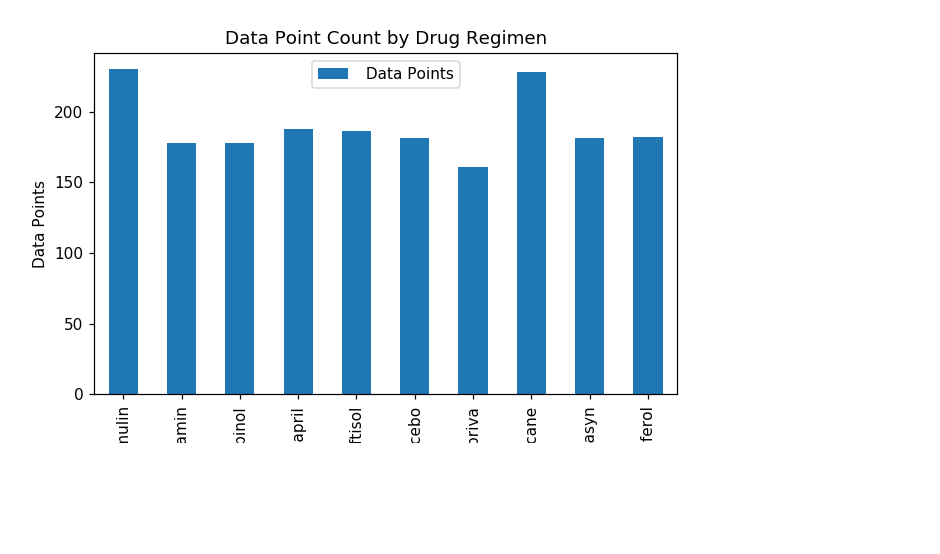

Text(0, 0.5, 'Data Points')

In [164]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Create new dataframe grouped by regimen
grouped_df = pd.DataFrame(merged_data.groupby(["Drug Regimen"]).count()).reset_index()

# Refine datafrme for the points to be graphed
panda_plot = grouped_df[["Drug Regimen","Mouse ID"]]
panda_plot = panda_plot.rename(columns={"Mouse ID": " Data Points"})

# Set the index to be "Drug Regimen" so they will be used as labels
panda_plot = panda_plot.set_index("Drug Regimen")

# Create a bar graph
panda_plot.plot(kind="bar")

# Set a title for the chart 
plt.title("Data Point Count by Drug Regimen")
plt.show()
# Label axes
plt.ylabel("Data Points")


<IPython.core.display.Javascript object>


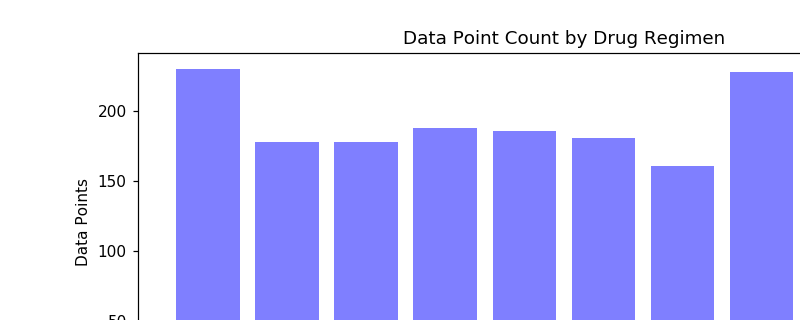

Text(0, 0.5, 'Data Points')

In [149]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Place the regimen names into a list
regimen_list = summary_statistics_df.index.tolist()

# Define x-axis based on regimen list
x_axis = np.arange(len(regimen_list))

# Place count of mouse ID by drug regimen into a list
data_count = (merged_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

# Create a bar graph
plt.figure(figsize=(10,5))
plt.bar(x_axis, data_count, color='b', alpha=0.5, align="center")

# Label x-axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_list)

plt.title("Data Point Count by Drug Regimen")
plt.ylabel("Data Points")

## Pie plots

<IPython.core.display.Javascript object>


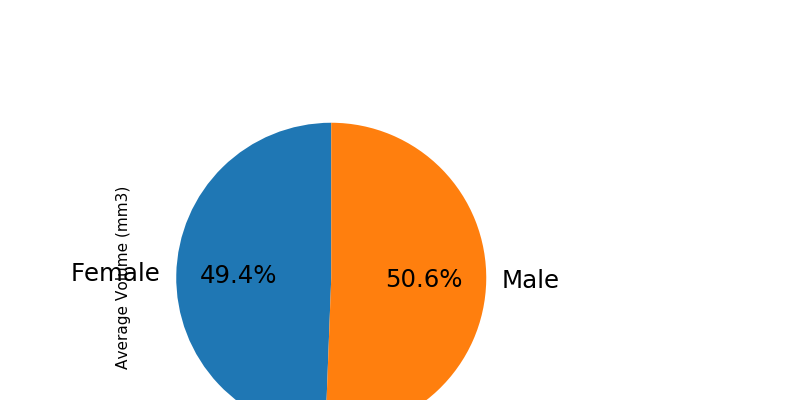

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create new dataframe grouped by gender
gender_df = pd.DataFrame(merged_data.groupby(["Sex"]).count()).reset_index()

# Refine dataframe for the columns needed
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})

# Plot pie chart for gender data
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = (merged_data.groupby(["Sex"])["Age_months"].count()).tolist()

# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)


([<matplotlib.patches.Wedge at 0x2c22391c160>,
 [Text(-1.1997814585120492, 0.02290091287918432, 'Females'),
  Text(1.0997996703027118, -0.02099250347258625, 'Males')],
 [Text(-0.699872517465362, 0.013358865846190855, '49.4%'),
  Text(0.5998907292560246, -0.011450456439592499, '50.6%')])

## Quartiles, outliers and boxplots

The lower quartile of volumes is: 32.37735684
The upper quartile of volumes is: 40.1592203
The interquartile range of volumess is: 7.781863460000004
The the median of volumes is: 37.31184577 
Values below 20.70456164999999 may be outliers.
Values above 51.83201549 may be outliers.


<IPython.core.display.Javascript object>


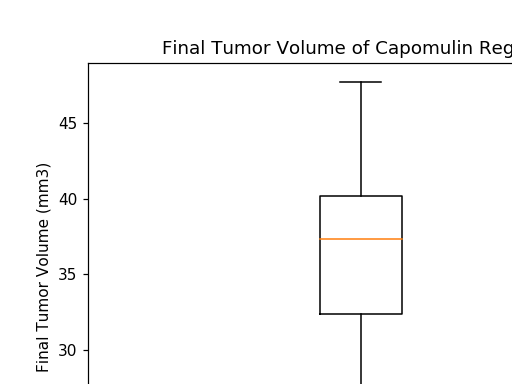

In [152]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

# Sort data by Drug Regimen, Mouse ID and Timepoint
sorted_df = merged_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

# Select final volume of each mouse # Final timepoint is 45
final_df = sorted_df.loc[sorted_df["Timepoint"] == 45]

# Select data for Capomulin regimen and reset index
capomulin_data_df = final_df[final_df['Drug Regimen'].isin(['Capomulin'])]

# Convert column "Tumor Volume" of Capomulin to a list
capomulin_list = capomulin_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capomulin_list = capomulin_list["Tumor Volume (mm3)"]

# Calculate quartiles
quartiles = capomulin_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volumes is: {lowerq}")
print(f"The upper quartile of volumes is: {upperq}")
print(f"The interquartile range of volumes is: {iqr}")
print(f"The the median of volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} may be outliers.")
print(f"Values above {upper_bound} may be outliers.")


# plot final total volume of Capomulin
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Capomulin Regimen')
ax1.set_xlabel('Capomulin')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(capomulin_list)
plt.show()




The lower quartile of volumes is: 30.981175224999998
The upper quartile of volumes is: 38.508305307499995
The interquartile range of volumes is: 7.527130082499998
The the median of volumes is: 34.848627300000004 
Values below 19.690480101250003 may be outliers.
Values above 49.79900043124999 may be outliers.


<IPython.core.display.Javascript object>


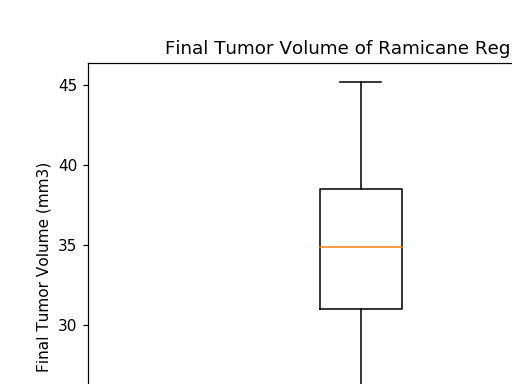

In [153]:
# Select data for Ramicane regimen and reset index
ramicane_data_df = final_df[final_df['Drug Regimen'].isin(['Ramicane'])]

# Convert column "Tumor Volume" of Ramicane to a list
ramicane_list = ramicane_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ramicane_list = ramicane_list["Tumor Volume (mm3)"]

# Calculate quartiles
quartiles = ramicane_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volumes is: {lowerq}")
print(f"The upper quartile of volumes is: {upperq}")
print(f"The interquartile range of volumes is: {iqr}")
print(f"The the median of volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} may be outliers.")
print(f"Values above {upper_bound} may be outliers.")


# Plot final total volume of Ramicane
fig1, ax2 = plt.subplots()
ax2.set_title('Final Tumor Volume of Ramicane Regimen')
ax2.set_xlabel('Ramicane')
ax2.set_ylabel('Final Tumor Volume (mm3)')
ax2.boxplot(ramicane_list)
plt.show()



The lower quartile of volumes is: 62.75445141
The upper quartile of volumes is: 67.68556862
The interquartile range of volumes is: 4.9311172099999965
The the median of volumes is: 66.08306589 
Values below 55.35777559500001 may be outliers.
Values above 75.08224443499999 may be outliers.


<IPython.core.display.Javascript object>


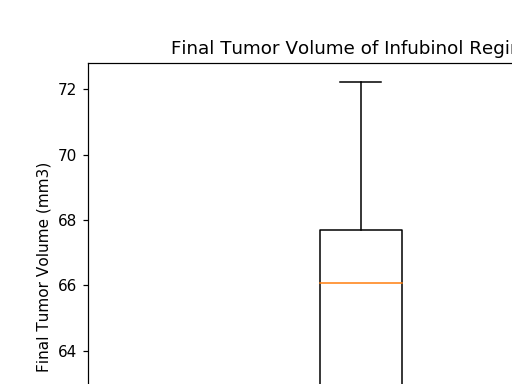

In [154]:
# Select data for Infubinol regimen and reset index
infubinol_data_df = final_df[final_df['Drug Regimen'].isin(['Infubinol'])]

# Convert column "Tumor Volume" of infubinol to a list
infubinol_list = infubinol_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infubinol_list = infubinol_list["Tumor Volume (mm3)"]

# Calculate quartiles
quartiles = infubinol_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volumes is: {lowerq}")
print(f"The upper quartile of volumes is: {upperq}")
print(f"The interquartile range of volumes is: {iqr}")
print(f"The the median of volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} may be outliers.")
print(f"Values above {upper_bound} may be outliers.")


# Plot final total volume of Infubinol
fig1, ax3 = plt.subplots()
ax3.set_title('Final Tumor Volume of Infubinol Regimen')
ax3.set_xlabel('Infubinol')
ax3.set_ylabel('Final Tumor Volume (mm3)')
ax3.boxplot(infubinol_list)
plt.show()


The lower quartile of volumes is: 62.75445141
The upper quartile of volumes is: 67.68556862
The interquartile range of volumes is: 4.9311172099999965
The the median of volumes is: 66.08306589 
Values below 55.35777559500001 may be outliers.
Values above 75.08224443499999 may be outliers.


<IPython.core.display.Javascript object>


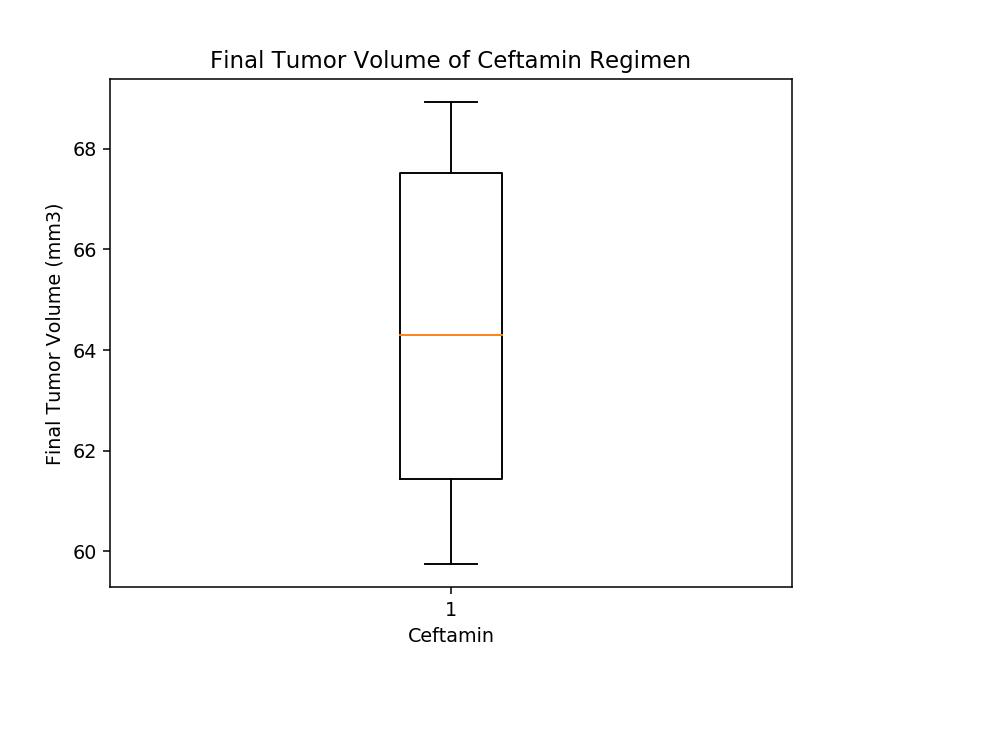

In [155]:
# Select data for Ceftamin regimen and reset index
ceftamin_data_df = final_df[final_df['Drug Regimen'].isin(['Ceftamin'])]

# Convert column "Tumor Volume" of Ceftamin to a list
ceftamin_list = ceftamin_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceftamin_list = ceftamin_list["Tumor Volume (mm3)"]

# Calculate quartiles
quartiles = infubinol_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volumes is: {lowerq}")
print(f"The upper quartile of volumes is: {upperq}")
print(f"The interquartile range of volumes is: {iqr}")
print(f"The the median of volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} may be outliers.")
print(f"Values above {upper_bound} may be outliers.")


# Plot final total volume of Ceftamin
fig1, ax4 = plt.subplots()
ax4.set_title('Final Tumor Volume of Ceftamin Regimen')
ax4.set_xlabel('Ceftamin')
ax4.set_ylabel('Final Tumor Volume (mm3)')
ax4.boxplot(ceftamin_list) 
plt.show()

In [156]:
#Combine 4 plots on one graph


## Line and scatter plots

<IPython.core.display.Javascript object>


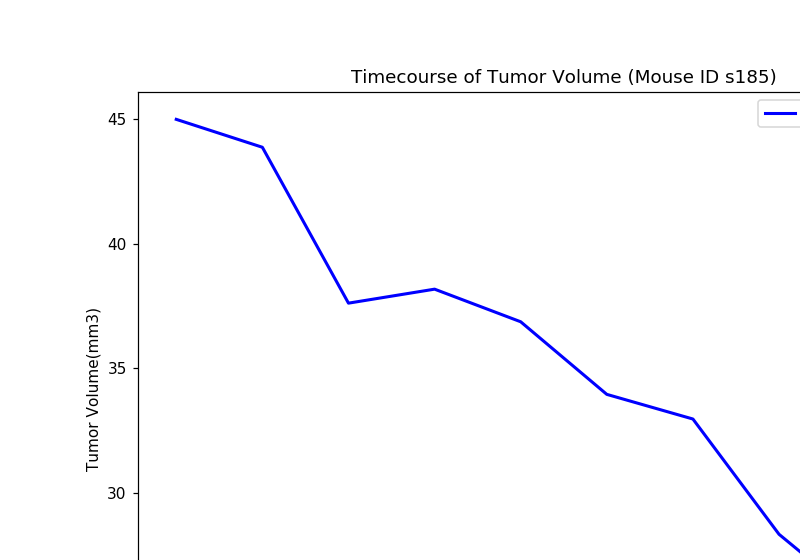

Text(0, 0.5, 'Tumor Volume(mm3)')

In [157]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Create a new DataFrame for Capomulin data only
capomulin_df = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()


# Refine data from one mouse id s185
mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
mouse_df.head()

# Select columns to be plotted 
mouse_df = mouse_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

#Remove original index
mouse_df = mouse_df.reset_index(drop=True)

# Create Line plot of volume vs. time
mouse_df.set_index('Timepoint').plot(figsize=(10, 5), linewidth=2, color='blue')
plt.title("Timecourse of Tumor Volume (Mouse ID s185)")
plt.ylabel("Tumor Volume(mm3)")

<IPython.core.display.Javascript object>


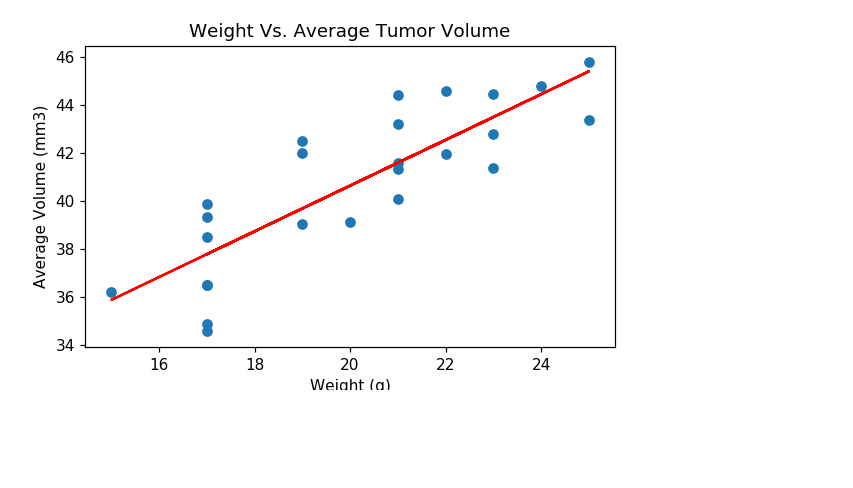

In [162]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Isolate data from mouse id, weight and volume
isolated_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

# Calculate average tumor volume for each mouse in new dataframe
average_capomulin_df = pd.DataFrame(isolated_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

# Rename Tumor Volumes as Average Tumor Volume
average_capomulin_df = average_capomulin_df.rename(columns={"Tumor Volume (mm3)": "Average Volume (mm3)"})

# Generate a scatter plot of mouse weight versus average tumor volume for each mouse in the Capomulin
average_capomulin_df.plot(kind="scatter", x="Weight (g)", y="Average Volume (mm3)", figsize=(10,5),
              title="Weight Vs. Average Tumor Volume")
plt.show()


In [170]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient
x_values = average_capomulin_df["Weight (g)"]
y_values = average_capomulin_df["Average Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Volume (mm3)")
print(f" r-squared equals {rvalue}")
plt.show()


 r-squared equals 0.8419363424694718
